<a href="https://colab.research.google.com/github/AymericShini/python-base/blob/master/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Demange Aymeric 10/09/2020#
#Le lien de mon Dataset https://www.kaggle.com/gregorut/videogamesales
#Mon Dataset porte sur les ventes des jeu vidéos dans le monde

In [1]:
!pip install numpy matplotlib pandas seaborn
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [101]:
df = pd.read_csv(r"/content/vgsales.csv")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [8]:
df["Year"].min()

1980.0

In [15]:
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})

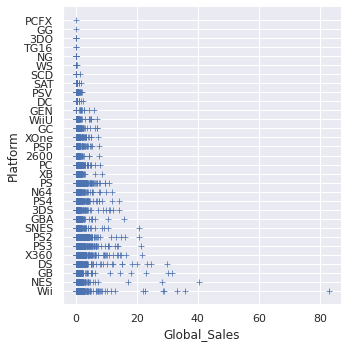

In [25]:
sns.relplot(y="Platform", x="Global_Sales", data=df, marker="+") 

In [26]:
dfCorr = df.corr()

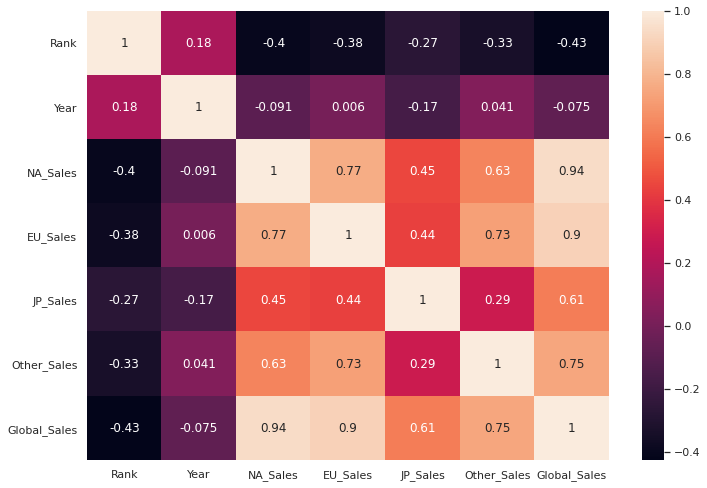

In [29]:
sns.heatmap(dfCorr, 
        xticklabels=dfCorr.columns,
        yticklabels=dfCorr.columns,
        annot=True)

In [27]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

dfCorr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.00,0.18,-0.40,-0.38,-0.27,-0.33,-0.43
Year,0.18,1.00,-0.09,0.01,-0.17,0.04,-0.07
NA_Sales,-0.40,-0.09,1.00,0.77,0.45,0.63,0.94
EU_Sales,-0.38,0.01,0.77,1.00,0.44,0.73,0.90
JP_Sales,-0.27,-0.17,0.45,0.44,1.00,0.29,0.61
Other_Sales,-0.33,0.04,0.63,0.73,0.29,1.00,0.75
Global_Sales,-0.43,-0.07,0.94,0.90,0.61,0.75,1.00


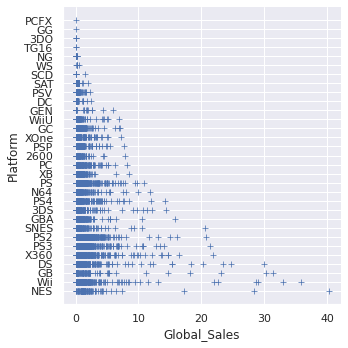

In [32]:
sns.relplot(y="Platform", x="Global_Sales", data=df.query("Global_Sales < 60 "), marker="+") 

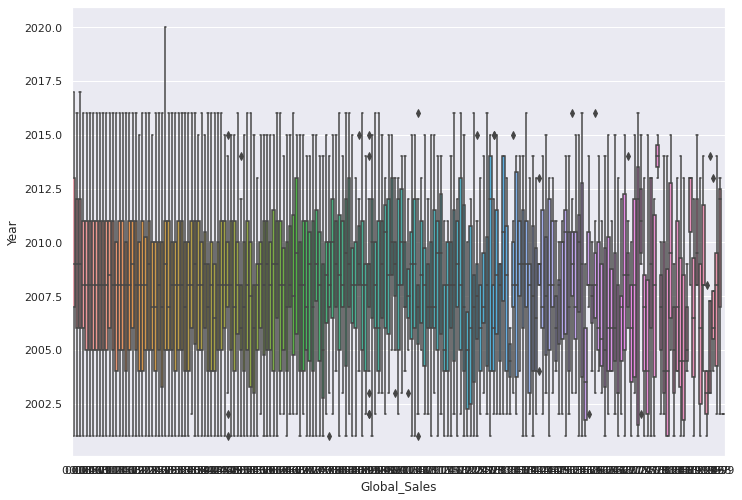

In [93]:
sns.boxplot(x="Global_Sales", y="Year", data=df.query("Global_Sales < 2 & Global_Sales > 0 & Year > 2000"))

In [82]:
df.groupby(['Publisher','Global_Sales']).sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fd00d6aec18>>

In [105]:
df = df.groupby('Publisher')
df.loc['Global_Sales'].sum()

AttributeError: ignored

In [89]:
df.loc[:,'Publisher'] = "Nintendo"
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Nintendo,0.01,0,0,0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Nintendo,0,0,0,0,0.01
16596,16599,Know How 2,DS,2010,Puzzle,Nintendo,0,0.01,0,0,0.01
16597,16600,Spirits & Spells,GBA,2003,Platform,Nintendo,0.01,0,0,0,0.01


In [46]:
#Inutile ça donne pas ce que je veut 
test["Global_Sales"].sum()

120.5644408403362

ValueError: ignored

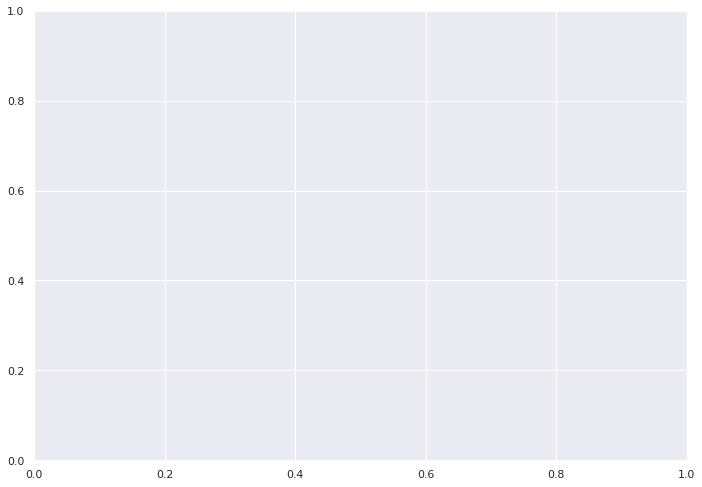

In [75]:
sns.distplot("Publisher")